In [111]:
"""
This script gathers raw txt files from 'HF test' folder, sorts Controls from UUT, converts them to panda
dataframe and then combines them into a single master dataframe that can be used to 
tidy up and reformat the information to allow automated plotting of glass impedance performance, etc.
RR
01/16/2025
"""
import pandas as pd
import glob
import csv

In [112]:
file_list = glob.glob('../HFdata/*.txt')
List_Controls = []
List_UUT = []
for nm, fln in enumerate(file_list):
    rawFile = fln.lstrip('../HFdata')
    if ('_glass_') in rawFile:
        if ('Controls') in rawFile:
            List_Controls.append(rawFile)
        if ('UUT') in rawFile:
            List_UUT.append(rawFile)
print(List_Controls)
print(List_UUT)
print(f'There are {len(List_Controls)} Control files.')
print(f'There are {len(List_UUT)} UUT files.')   

['\\Controls_10_glass_09_28_33.txt', '\\Controls_11_glass_21_28_33.txt', '\\Controls_12_glass_09_28_34.txt', '\\Controls_13_glass_21_28_35.txt', '\\Controls_14_glass_09_28_35.txt', '\\Controls_15_glass_21_28_36.txt', '\\Controls_16_glass_09_28_38.txt', '\\Controls_17_glass_21_28_39.txt', '\\Controls_18_glass_09_28_39.txt', '\\Controls_19_glass_21_28_39.txt', '\\Controls_1_glass_21_28_29.txt', '\\Controls_20_glass_09_28_40.txt', '\\Controls_21_glass_21_28_40.txt', '\\Controls_22_glass_09_28_40.txt', '\\Controls_23_glass_21_28_41.txt', '\\Controls_24_glass_09_28_42.txt', '\\Controls_25_glass_21_28_42.txt', '\\Controls_26_glass_09_28_43.txt', '\\Controls_27_glass_21_28_43.txt', '\\Controls_28_glass_09_28_44.txt', '\\Controls_29_glass_21_28_45.txt', '\\Controls_2_glass_09_28_29.txt', '\\Controls_30_glass_09_28_45.txt', '\\Controls_31_glass_21_28_46.txt', '\\Controls_32_glass_09_28_47.txt', '\\Controls_33_glass_21_29_35.txt', '\\Controls_34_glass_09_29_36.txt', '\\Controls_35_glass_21_29_37

In [113]:
# Get the header from first Control file
result = List_Controls[0]
with open(f'../HFdata/{result}','r') as f:
    header_ctrls = f.readline()
    timestampHeader_ctrls = ("Timestamp\t" + header_ctrls)
    print(timestampHeader_ctrls)
header_list_ctrls = timestampHeader_ctrls.split("\t")
header_list_ctrls = header_list_ctrls[:-1]
print(header_list_ctrls)

Timestamp	62309060476	62309060477	62309060478	62309060479	62309060481	62309060482	

['Timestamp', '62309060476', '62309060477', '62309060478', '62309060479', '62309060481', '62309060482']


In [114]:
# Get the header from first UUT file
result = List_UUT[0]
with open(f'../HFdata/{result}','r') as f:
    header_uuts = f.readline()
    timestampHeader_uuts = ("Timestamp\t" + header_uuts)
    print(timestampHeader_uuts)
header_list_uuts = timestampHeader_uuts.split("\t")
header_list_uuts = header_list_uuts[:-1]
print(header_list_uuts)

Timestamp	62309060419	62309060427	62309060471	62309060472	62309060473	62309060475	

['Timestamp', '62309060419', '62309060427', '62309060471', '62309060472', '62309060473', '62309060475']


In [116]:
# Merge all control data files into single dataframe, then add column for Hours Time
DF_Controls_single = []
for i in range(len(List_Controls)):
    DF_Controls = pd.read_csv(f'../HFdata/{List_Controls[i]}',sep='\t',header=None,skiprows=1)
    DF_Controls = DF_Controls.drop(columns=7)
    DF_Controls_single.append(DF_Controls)
DF_concat_Controls = pd.concat(DF_Controls_single, ignore_index=True) # single dataframe
DF_concat_Controls.columns = header_list_ctrls
print(DF_concat_Controls.head())

      Timestamp  62309060476  62309060477  62309060478  62309060479  \
0  1.700029e+09          0.0          0.0       94.746       78.444   
1  1.700033e+09          0.0          0.0       93.854       77.974   
2  1.700037e+09          0.0          0.0       92.951       77.367   
3  1.700041e+09          0.0          0.0       91.940       76.725   
4  1.700045e+09          0.0          0.0       90.891       75.991   

  62309060481  62309060482  
0     232.312      103.629  
1     231.795      102.991  
2     231.174      102.335  
3     230.193      101.489  
4     229.143      100.591  


In [117]:
# Merge all UUT data files into single dataframe
DF_UUT_single = []
for i in range(len(List_UUT)):
    DF_UUTs = pd.read_csv(f'../HFdata/{List_UUT[i]}',sep='\t',header=None,skiprows=1)
    DF_UUTs = DF_UUTs.drop(columns=7)
    DF_UUT_single.append(DF_UUTs)
DF_concat_UUTs = pd.concat(DF_UUT_single, ignore_index=True) # single dataframe
DF_concat_UUTs.columns = header_list_uuts
print(DF_concat_UUTs.head())

      Timestamp  62309060419  62309060427  62309060471  62309060472  \
0  1.700029e+09      292.367      276.854      266.070      109.499   
1  1.700033e+09      291.705      276.064      265.387      109.407   
2  1.700037e+09      290.789      275.138      264.473      108.988   
3  1.700041e+09      289.730      274.111      263.545      108.733   
4  1.700045e+09      288.371      272.930      262.288      108.138   

   62309060473  62309060475  
0      147.128      145.097  
1      146.899      144.828  
2      146.539      144.570  
3      146.184      144.014  
4      145.463      143.432  


In [118]:
DF_Controls_ordered = DF_concat_Controls.sort_values(by='Timestamp',ignore_index=True) # ascending is the default sequence.
DF_Controls_ordered['Time (Hrs.)'] = (DF_Controls_ordered['Timestamp'] - DF_Controls_ordered['Timestamp'].min()) / 3600

In [122]:
print(DF_Controls_ordered['62309060476'].iloc[114]) # bad data point, to be replaced with zero later

9999.0


In [123]:
DF_Controls_ordered.to_excel('Controls.xlsx', sheet_name='Controls', index=False) # save copy as excel file.

In [124]:
DF_UUTs_ordered = DF_concat_UUTs.sort_values(by='Timestamp',ignore_index=True) # ascending is the default sequence.
DF_UUTs_ordered['Time (Hrs.)'] = (DF_UUTs_ordered['Timestamp'] - DF_UUTs_ordered['Timestamp'].min()) / 3600
DF_UUTs_ordered.to_excel('UUTs.xlsx', sheet_name='UUTs', index=False) # save copy as excel file.

In [125]:
DF_Controls_ordered.info() # check data types for possible cleaning out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    687 non-null    float64
 1   62309060476  687 non-null    float64
 2   62309060477  687 non-null    float64
 3   62309060478  687 non-null    float64
 4   62309060479  687 non-null    float64
 5   62309060481  687 non-null    object 
 6   62309060482  687 non-null    float64
 7   Time (Hrs.)  687 non-null    float64
dtypes: float64(7), object(1)
memory usage: 43.1+ KB


In [ ]:
print(DF_Controls_ordered['62309060481'].iloc[584:590]) # this is where bad data starts and runs until last row (688). Remember to substract "2" on code.

584    0.0
585    $=K
586    $=K
587    $=K
588    $=K
589    $=K
Name: 62309060481, dtype: object


In [128]:
DF_UUTs_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    687 non-null    float64
 1   62309060419  687 non-null    float64
 2   62309060427  687 non-null    float64
 3   62309060471  687 non-null    float64
 4   62309060472  687 non-null    float64
 5   62309060473  687 non-null    float64
 6   62309060475  687 non-null    float64
 7   Time (Hrs.)  687 non-null    float64
dtypes: float64(8)
memory usage: 43.1 KB


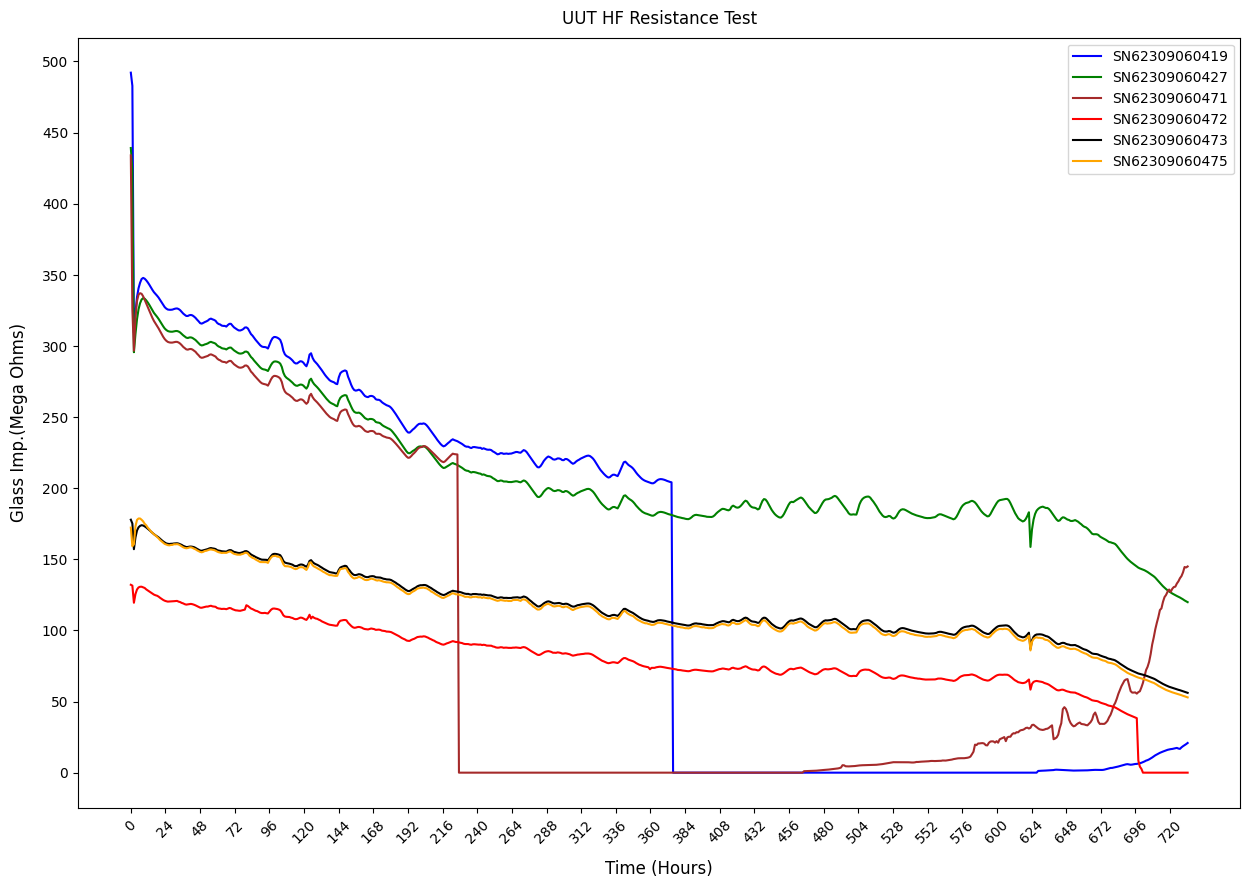

In [137]:
# Plotting data - multiple curves in same plot
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,figsize=(15,10)) # width x height of plot
plt.plot(DF_UUTs_ordered['Time (Hrs.)'],DF_UUTs_ordered['62309060419'],color='blue',label='SN62309060419') # label is needed for the legend name!
plt.plot(DF_UUTs_ordered['Time (Hrs.)'],DF_UUTs_ordered['62309060427'],color='green',label='SN62309060427')
plt.plot(DF_UUTs_ordered['Time (Hrs.)'],DF_UUTs_ordered['62309060471'],color='brown',label='SN62309060471')
plt.plot(DF_UUTs_ordered['Time (Hrs.)'],DF_UUTs_ordered['62309060472'],color='red',label='SN62309060472')
plt.plot(DF_UUTs_ordered['Time (Hrs.)'],DF_UUTs_ordered['62309060473'],color='black',label='SN62309060473')
plt.plot(DF_UUTs_ordered['Time (Hrs.)'],DF_UUTs_ordered['62309060475'],color='orange',label='SN62309060475')
listOf_Xticks = np.arange(0,734,24) # intervals of 24 Hrs.(1 Day)
plt.xticks(listOf_Xticks,rotation=45)
listOf_Yticks = np.arange(0,550,50)
plt.yticks(listOf_Yticks)
plt.title('UUT HF Resistance Test',fontsize=12,pad=10)
plt.xlabel('Time (Hours)',fontsize=12,labelpad=10)
plt.ylabel('Glass Imp.(Mega Ohms)',fontsize=12,labelpad=10)
plt.legend()
plt.show()

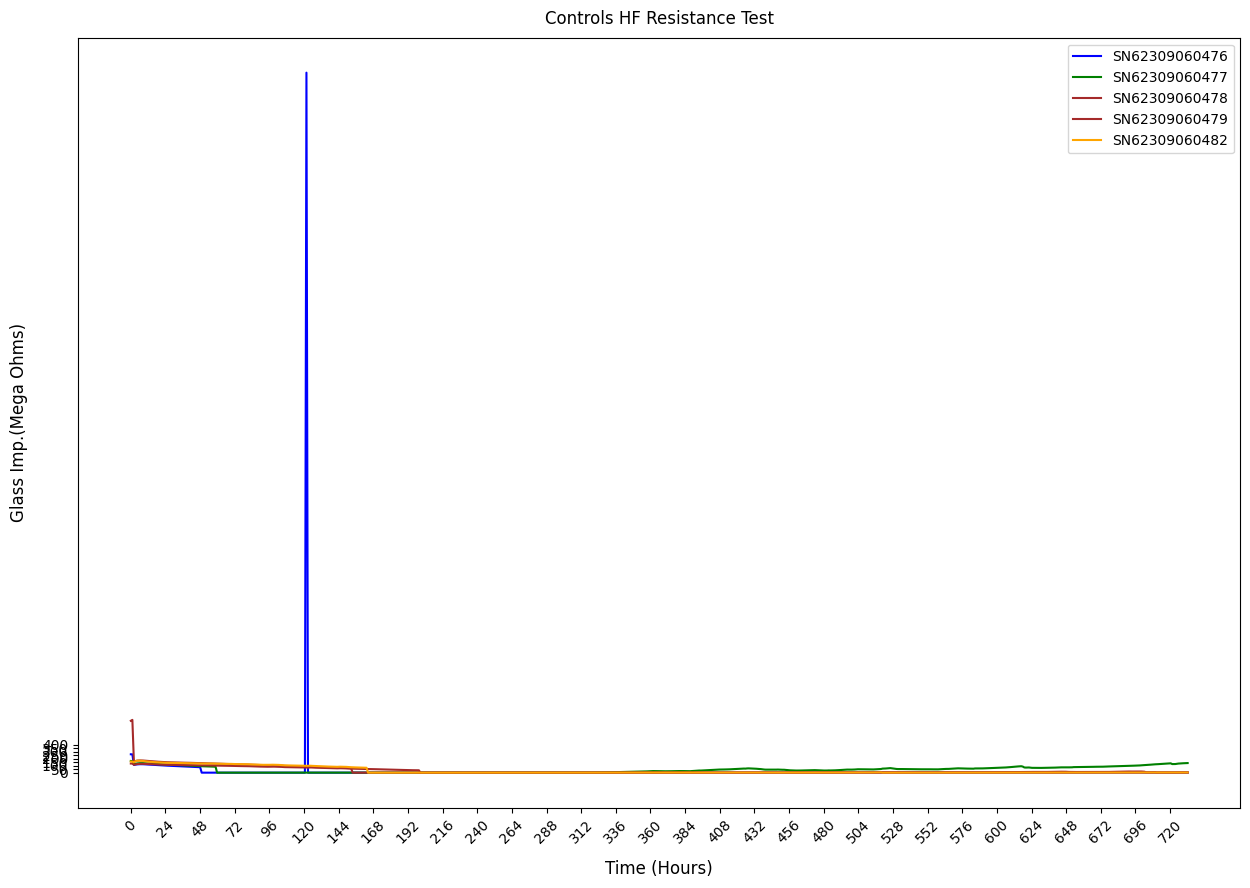

In [140]:
fig, ax = plt.subplots(1,figsize=(15,10)) # width x height of plot
plt.plot(DF_Controls_ordered['Time (Hrs.)'],DF_Controls_ordered['62309060476'],color='blue',label='SN62309060476') # label is needed for the legend name!
plt.plot(DF_Controls_ordered['Time (Hrs.)'],DF_Controls_ordered['62309060477'],color='green',label='SN62309060477')
plt.plot(DF_Controls_ordered['Time (Hrs.)'],DF_Controls_ordered['62309060478'],color='brown',label='SN62309060478')
plt.plot(DF_Controls_ordered['Time (Hrs.)'],DF_Controls_ordered['62309060479'],color='brown',label='SN62309060479')
#plt.plot(DF_Controls_ordered['Time (Hrs.)'],DF_Controls_ordered['62309060481'],color='black',label='SN62309060481')
plt.plot(DF_Controls_ordered['Time (Hrs.)'],DF_Controls_ordered['62309060482'],color='orange',label='SN62309060482')
listOf_Xticks = np.arange(0,734,24) # intervals of 
plt.xticks(listOf_Xticks,rotation=45)
listOf_Yticks = np.arange(0,450,50)
plt.yticks(listOf_Yticks)
plt.title('Controls HF Resistance Test',fontsize=12,pad=10)
plt.xlabel('Time (Hours)',fontsize=12,labelpad=10)
plt.ylabel('Glass Imp.(Mega Ohms)',fontsize=12,labelpad=10)
plt.legend()
plt.show()